In [1]:
import os 
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "3" # "0,1,2,3" # "0"

In [3]:
import numpy as np
import h5py
import cv2
import os, sys
import argparse
from core.get_args import get_args
from core.produce_denoised_img import produce_denoised_img_no_crop
from core.utils import TedataLoader
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from core.watershed import watershed,watershed_per_img,watershed_original,watershed_test
from core.median_filter import apply_median_filter_cpu, apply_median_filter_gpu, apply_median_filter_gpu_simple
%load_ext autoreload
%autoreload 2

['denoised_img_median_filter_img_dict.npy']


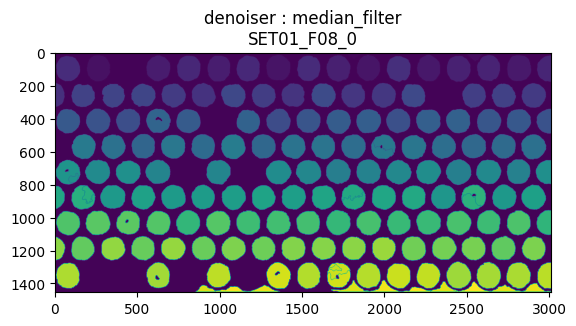

SystemExit: -1

/mnt/ssd/hyun/fbi-net/env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3406: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [7]:
img_dict = {}

debug = False
print_img=True
# target_y = 'F08'
# dataset_version = 'v2'
# target = f"{target_y}_{dataset_version}"

target_list = [f"median_filter"]
for target in [['F02','v2'],['F04','v2'],['F08','v2'],['F16','v2'],['F16','v1']]:
    target = f"{target[0]}_{target[1]}"
    target_list.append(target)
for target in target_list:
    # print(target)
    data_path = f"../intermediate_result/denoised_img_{target}_img_dict.npy"
    print(data_path.split("/")[2:])
    img_dict = np.load(data_path,allow_pickle=True).item()

    for set_num in img_dict.keys():
        # print(img_dict[set_num].keys())
        
        for f_num in img_dict[set_num].keys():
            # print(denoised_img_dict[set_num][f_num].shape)
            f_num = f_num[:3]
            for idx,img in enumerate(img_dict[set_num][f_num]):
                # print(img.shape,img.min(),img.max())
                img_uint8 = (img[0]*255).astype('uint8')[:-20]

                # img_uint8 = apply_median_filter_gpu_simple(img_uint8,repeat=3)[0][0].astype('uint8')
                # print(img_uint8.shape,img_uint8.min(),img_uint8.max())
                r = watershed_original(img_uint8)
                # r = watershed_test(img_uint8)
                if set_num == 'SET01' and f_num == 'F08' and idx == 0 and print_img is True:
                    plt.title(f"denoiser : {target}\n{set_num}_{f_num}_{idx}")
                    # r[r>-1] = 1
                    plt.imshow(r)
                    plt.pause(0.01)
                sys.exit(-1)

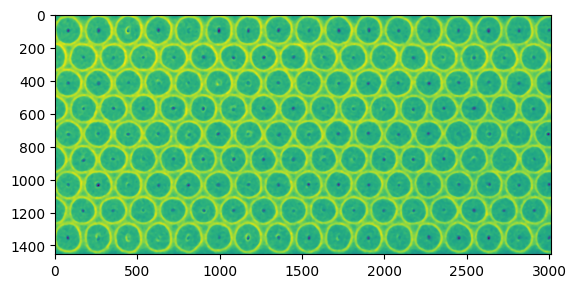

In [8]:
plt.imshow(img_uint8)

In [10]:
img_uint8.max()

193

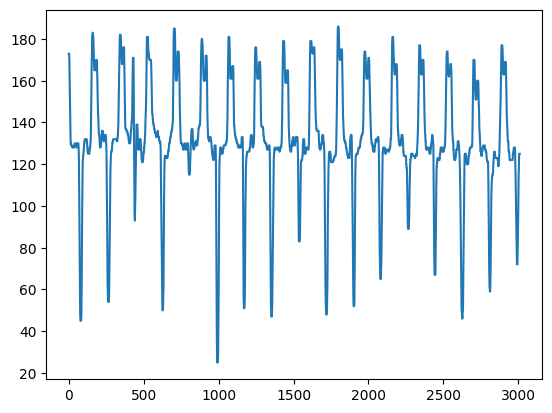

In [16]:
plt.plot(img_uint8[100])

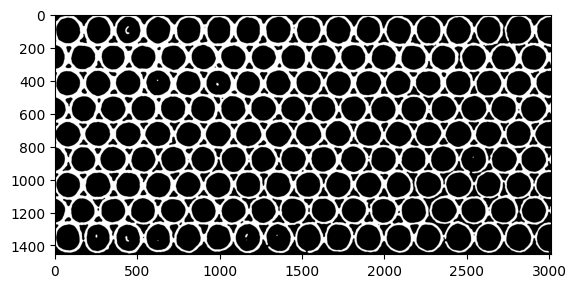

In [15]:
ret, th1 = cv2.threshold(img_uint8.copy(),155,255,cv2.THRESH_BINARY)
# ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(th1,cmap='gray')

In [14]:
th1[300][:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)